# IMPORTING LIBRARIES & DATASET

The initial step is to import libraries that is required to process the apriori algoithm, followed by importing the libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
dataset = pd.read_csv("Online_retail.csv")
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


# DATA FEATUES

Knowing our dataset is essential step beforeprocessing our data. Hence we analyze the data types in our dataset 

In [3]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# MISSING VALUES

This  stage deals with estimating the number of missing values. there are 1454 missing values in Description and 135080 missing values in Customer ID. Followed by removing the missing values

In [5]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
dataset.dropna(subset=['Description'],axis=0,inplace=True)

dataset.isnull().sum()

In [9]:
dataset.isnull().sum()/len(dataset)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.724723
Country         0.000000
dtype: float64

# REDUNDANT VALUES

The data set consists of several repetitive, redundant and unwanted features. One of these are transactions that contains C in
their Invoice No., as these stands for cancelled purchases (mentioned in the question). Another inconsistency in the dataset ids the presence of spaces in between description of products, as this would create problem in processing the codes. Hence, we remove these spaces and convert the description into strings that smoothens the processing of dataset Also, we must
delete all those entries that is having Duplicate entries in InvoiceNo and Description. Apart from these we are also deleting descriptions that contain wrong, missing, postage, lost, display, damages, lost, throw, wrongly coded, check, discount, Manual and POSTAGE. 

In [10]:
dataset[dataset['InvoiceNo'].str.contains("C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01/12/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09/12/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09/12/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09/12/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09/12/2011 11:58,1.25,17315.0,United Kingdom


In [11]:
dataset.shape

(540455, 8)

In [12]:
#Data Preprocessing
#Removes spaces from beginning and ending of the Description
dataset['Description'] =dataset['Description'].str.strip()

#Removing Duplicate Invoice and Converting Invoice number to be a string
dataset.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')

#Remove the Credit Transactions the one listed above
dataset= dataset[~dataset['InvoiceNo'].str.contains('C')]

In [14]:
#Removing other wrong and unwanted entries in the dataset
dataset['Description'] = dataset['Description'].astype('str')
dataset = dataset[~dataset['Description'].str.contains('wrong')]
dataset = dataset[~dataset['Description'].str.contains('missing')]
dataset = dataset[~dataset['Description'].str.contains('postage')]
dataset = dataset[~dataset['Description'].str.contains('lost')]
dataset = dataset[~dataset['Description'].str.contains('display')]
dataset = dataset[~dataset['Description'].str.contains('damage')]
dataset = dataset[~dataset['Description'].str.contains('throw')]
dataset = dataset[~dataset['Description'].str.contains('wrongly coded')]
dataset = dataset[~dataset['Description'].str.contains('check')]
dataset = dataset[~dataset['Description'].str.contains('discount')]
dataset = dataset[~dataset['Description'].str.contains('Manual')]
dataset = dataset[~dataset['Description'].str.contains('(POSTAGE)')]

C:\Users\Reshm\AppData\Local\Temp\ipykernel_8640\611194789.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dataset = dataset[~dataset['Description'].str.contains('(POSTAGE)')]


# CORRELATION

Estimating the correlation between Quantity and Unit price

In [15]:
dataset = dataset.drop(labels=['CustomerID'],axis=1)

<AxesSubplot:>

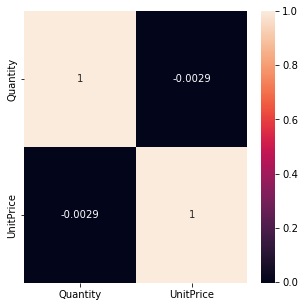

In [16]:
# Heatmap for finding correlation
plt.figure(figsize=(5,5))
sns.heatmap(dataset.corr(), annot = True)

In [17]:
 #Removing Duplicate entries
dataset.drop_duplicates(subset=None, keep='first', inplace=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,France


# ANALYSING DATASET

Among 38 countries in the list, only 11 countries are having baskets are having a count of above 1000. The highest 3 among
this list being United Kingdom, Germany and France. In this analysis we are taking the top 3 countries with the highest number of baskets. 

In [19]:
dataset.shape

(528678, 7)

In [21]:
dataset['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [22]:
dataset['Country'].value_counts()

United Kingdom          484798
Germany                   8659
France                    8102
EIRE                      7889
Spain                     2423
Netherlands               2326
Switzerland               1936
Belgium                   1935
Portugal                  1464
Australia                 1184
Norway                    1049
Channel Islands            747
Italy                      741
Finland                    647
Cyprus                     612
Unspecified                446
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     295
Hong Kong                  279
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon 

# UK BASKET

A basket- Basket_UK- is formed to segregate all transactions happening in UK. This dataset consists of 18247 rows and 4115 columns. That means total items in Basket_UK is 4115 items. 

In [23]:
# Transactions done in the United Kingdom
basket_UK = (dataset[dataset['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_UK

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,temp adjustment,test,to push order througha s stock was,website fixed,wet,wet boxes,wet pallet,wet rusty,wet/rusty,wet?
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Defining the hot encoding function to make the data suitable
def hot_encode(x):
    if(x<=0):
        return 0
    if(x>= 1):
        return 1

In [25]:
#Applying One Hot encoding
basket_encoded_UK = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded_UK
basket_UK.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,temp adjustment,test,to push order througha s stock was,website fixed,wet,wet boxes,wet pallet,wet rusty,wet/rusty,wet?
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Building the model
frq_items_UK = apriori(basket_UK, min_support = 0.03, use_colnames = True)

#Collecting the inferred rules in a data frame
rules_UK = association_rules(frq_items_UK, metric ="lift", min_threshold = 1)
rules_UK = rules_UK.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules_UK.head(20))

                            antecedents                          consequents  \
2      (PINK REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
5     (GREEN REGENCY TEACUP AND SAUCER)    (ROSES REGENCY TEACUP AND SAUCER)   
4     (ROSES REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
9             (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
0          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED)   
7      (JUMBO  BAG BAROQUE BLACK WHITE)            (JUMBO BAG RED RETROSPOT)   
3     (GREEN REGENCY TEACUP AND SAUCER)     (PINK REGENCY TEACUP AND SAUCER)   
12             (JUMBO STORAGE BAG SUKI)            (JUMBO BAG RED RETROSPOT)   
1            (ALARM CLOCK BAKELIKE RED)         (ALARM CLOCK BAKELIKE GREEN)   
11  (JUMBO SHOPPER VINTAGE RED PAISLEY)            (JUMBO BAG RED RETROSPOT)   
16            (LUNCH BAG PINK POLKADOT)            (LUNCH BAG RED RETROSPOT)   
14            (LUNCH BAG  BLACK SKULL.) 

In [27]:
basket_UK['PINK REGENCY TEACUP AND SAUCER'].sum()

703

In [28]:
basket_UK['GREEN REGENCY TEACUP AND SAUCER'].sum()

934

In [29]:
# sorting the basket based on Lift and Confidence
rules_UK[(rules_UK['lift'] >= 10) & (rules_UK)['confidence'] >= 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038527,0.051186,0.031622,0.820768,16.034857,0.029650,5.293777
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051186,0.052447,0.038417,0.750535,14.310364,0.035733,3.798346
4,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.052447,0.051186,0.038417,0.732497,14.310364,0.035733,3.546932
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048008,0.050967,0.030854,0.642694,12.609934,0.028408,2.656079
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051186,0.038527,0.031622,0.617773,16.034857,0.029650,2.515451
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.050967,0.048008,0.030854,0.605376,12.609934,0.028408,2.412405


# GERMANY BASKET

 A basket- Basket_Germany- is formed to segregate all transactions happening in Germany. This dataset consists of 443 rows and 1693 columns. That means total items in Basket_Germany is 1693 items

In [31]:
#Separating Transactions Based on Countries - 'Germany'
basket_Germany = (dataset[dataset['Country'] == 'Germany']
            .groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))
basket_Germany

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Applying One Hot encoding
basket_encoded_2=basket_Germany.applymap(hot_encode)
basket_Germany = basket_encoded_2
basket_Germany.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Building the model
freq_items_Germany = apriori(basket_Germany, min_support = 0.03, use_colnames = True)

#Collecting the inferred rules in a data frame
rules_Germany = association_rules(freq_items_Germany, metric= "lift", min_threshold = 1)
rules_Germany = rules_Germany.sort_values(['confidence', 'lift'], ascending = [False,False])

In [34]:
print(rules_Germany.head(20))

                                           antecedents  \
179  (RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE...   
185  (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF ...   
26                            (JAM JAR WITH GREEN LID)   
33                           (JUMBO BAG PINK POLKADOT)   
143  (CHARLOTTE BAG APPLES DESIGN, ROUND SNACK BOXE...   
138                          (SPACEBOY CHILDRENS BOWL)   
20                          (COFFEE MUG PEARS  DESIGN)   
135                      (SET/6 RED SPOTTY PAPER CUPS)   
174  (PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK...   
191  (WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET...   
139                           (SPACEBOY CHILDRENS CUP)   
98                       (RED RETROSPOT CHARLOTTE BAG)   
117                (ROUND SNACK BOXES SET OF 4 FRUITS)   
162  (PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...   
18                        (CHILDRENS CUTLERY SPACEBOY)   
16                         (CHARLOTTE BAG SUKI DESIGN)   
134           

In [35]:
# sorting the basket based on Lift and Confidence
rules_Germany[(rules_Germany['lift'] >= 14) & (rules_Germany)['confidence'] >= 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.036117,0.065463,0.033860,0.937500,14.321121,0.031496,14.952596
138,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.042889,0.045147,0.038375,0.894737,19.818421,0.036438,9.071106
20,(COFFEE MUG PEARS DESIGN),(COFFEE MUG APPLES DESIGN),0.040632,0.063205,0.036117,0.888889,14.063492,0.033549,8.431151
135,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.054176,0.058691,0.047404,0.875000,14.908654,0.044224,7.530474
139,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.045147,0.042889,0.038375,0.850000,19.818421,0.036438,6.380737
18,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.049661,0.051919,0.040632,0.818182,15.758893,0.038054,5.214447
134,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.058691,0.054176,0.047404,0.807692,14.908654,0.044224,4.918284
19,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.051919,0.049661,0.040632,0.782609,15.758893,0.038054,4.371558
21,(COFFEE MUG APPLES DESIGN),(COFFEE MUG PEARS DESIGN),0.063205,0.040632,0.036117,0.571429,14.063492,0.033549,2.238525
27,(JAM JAR WITH PINK LID),(JAM JAR WITH GREEN LID),0.065463,0.036117,0.033860,0.517241,14.321121,0.031496,1.996614


# FRANCE BASKET

A basket- Basket_France- is formed to segregate all transactions happening in France. This dataset consists of 383 rows and 1561 columns. That means total items in Basket_France is 1561 items. 

In [36]:
rules_Germany[(rules_Germany)['confidence'] == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
179,"(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE...",(WOODLAND CHARLOTTE BAG),0.031603,0.130926,0.031603,1.0,7.637931,0.027465,inf


In [38]:
#Separating Transactions Based on Countries - 'France'
basket_France = (dataset[dataset['Country'] == 'France']
            .groupby(['InvoiceNo', 'Description'])['Quantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('InvoiceNo'))
basket_France

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#Applying One Hot encoding
basket_encoded_3=basket_France.applymap(hot_encode)
basket_France = basket_encoded_3
basket_France.head(20)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Building the model
freq_items_France = apriori(basket_France, min_support = 0.03, use_colnames = True)

#Collecting the inferred rules in a data frame
rules_France = association_rules(freq_items_France, metric= "lift", min_threshold = 1)
rules_France = rules_France.sort_values(['confidence', 'lift'], ascending = [False,False])

In [41]:
#Removing Duplicate entries
rules_France.drop_duplicates(subset=None, keep='first', inplace=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
988,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.036554,0.041775,0.036554,1.000000,23.937500,0.035026,inf
1105,"(PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.031332,0.041775,0.031332,1.000000,23.937500,0.030023,inf
1110,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL ...","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKUL...",0.031332,0.041775,0.031332,1.000000,23.937500,0.030023,inf
1133,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.031332,0.041775,0.031332,1.000000,23.937500,0.030023,inf
1136,"(SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 2...","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKUL...",0.031332,0.041775,0.031332,1.000000,23.937500,0.030023,inf
...,...,...,...,...,...,...,...,...,...
420,(RED TOADSTOOL LED NIGHT LIGHT),(SET/20 RED RETROSPOT PAPER NAPKINS),0.185379,0.135770,0.031332,0.169014,1.244854,0.006163,1.040005
146,(RABBIT NIGHT LIGHT),(JUMBO BAG WOODLAND ANIMALS),0.193211,0.078329,0.031332,0.162162,2.070270,0.016198,1.100059
130,(RABBIT NIGHT LIGHT),(JUMBO BAG RED RETROSPOT),0.193211,0.099217,0.031332,0.162162,1.634424,0.012162,1.075128
230,(RABBIT NIGHT LIGHT),(LUNCH BAG WOODLAND),0.193211,0.120104,0.031332,0.162162,1.350176,0.008126,1.050198


In [42]:
print(rules_France.head(20))

                                            antecedents  \
988   (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...   
1105  (PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...   
1110  (PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL ...   
1133  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
1136  (SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 2...   
566   (SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...   
710   (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...   
917   (PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL ...   
928   (PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...   
957   (SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 2...   
970   (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
985   (SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...   
1099  (PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...   
1128  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
506   (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...   
890   (MINI PAINT SET VINTAGE, SET/6 RED SPOTTY PAPE... 

In [43]:
# sorting the basket based on Lift and Confidence
rules_France[(rules_France['lift'] >= 23) & (rules_France)['confidence'] == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
988,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.036554,0.041775,0.036554,1.000000,23.937500,0.035026,inf
1105,"(PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.031332,0.041775,0.031332,1.000000,23.937500,0.030023,inf
1110,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL ...","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKUL...",0.031332,0.041775,0.031332,1.000000,23.937500,0.030023,inf
1133,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...",0.031332,0.041775,0.031332,1.000000,23.937500,0.030023,inf
1136,"(SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 2...","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKUL...",0.031332,0.041775,0.031332,1.000000,23.937500,0.030023,inf
1134,"(SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6...","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...",0.033943,0.036554,0.031332,0.923077,25.252747,0.030091,12.524804
1131,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...","(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO...",0.033943,0.039164,0.031332,0.923077,23.569231,0.030002,12.490862
1165,"(SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6...","(PACK OF 6 SKULL PAPER CUPS, SET/6 RED SPOTTY ...",0.033943,0.039164,0.031332,0.923077,23.569231,0.030002,12.490862
993,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT...","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...",0.041775,0.036554,0.036554,0.875000,23.937500,0.035026,7.707572
1147,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKU...","(SET/20 RED RETROSPOT PAPER NAPKINS, PACK OF 6...",0.036554,0.033943,0.031332,0.857143,25.252747,0.030091,6.762402


In [44]:
rules_France[(rules_France)['confidence'] == 1]. shape

(51, 9)